In [56]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("merged_cleaned.csv")

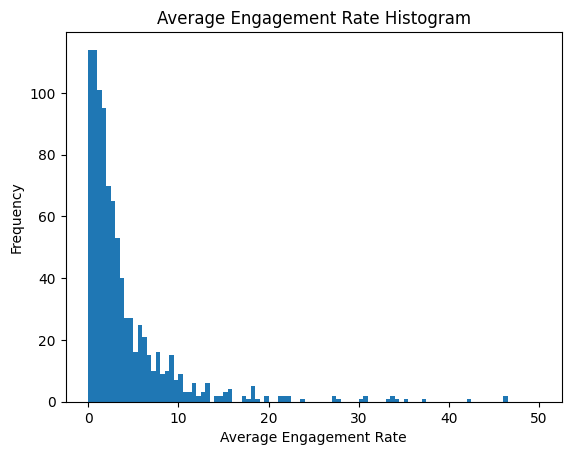

In [ ]:
hist = df["Average_Engagement_Rate"].plot(kind="hist", bins=100, range=(0, 50))
hist.set_xlabel("Average Engagement Rate")
plt.title("Average Engagement Rate Histogram")

plt.show()

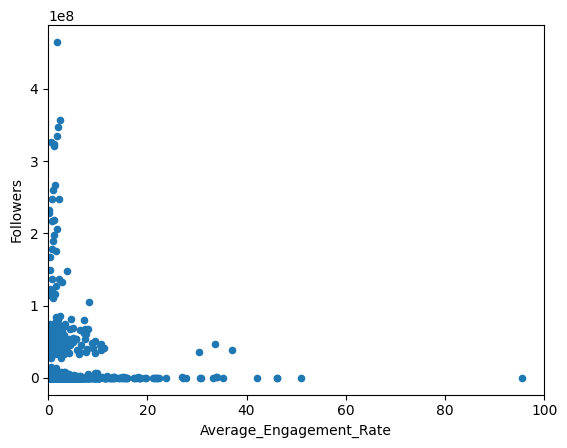

In [52]:
df.plot(kind="scatter", x="Average_Engagement_Rate", y="Followers")

plt.xlim(0, 100)
plt.ticklabel_format(style="plain", axis="x")

AER : Average Engagement Rate
AER (60D): Average Engagement Rate Last 60 Days
AL : Average Likes
AC: Average Comments


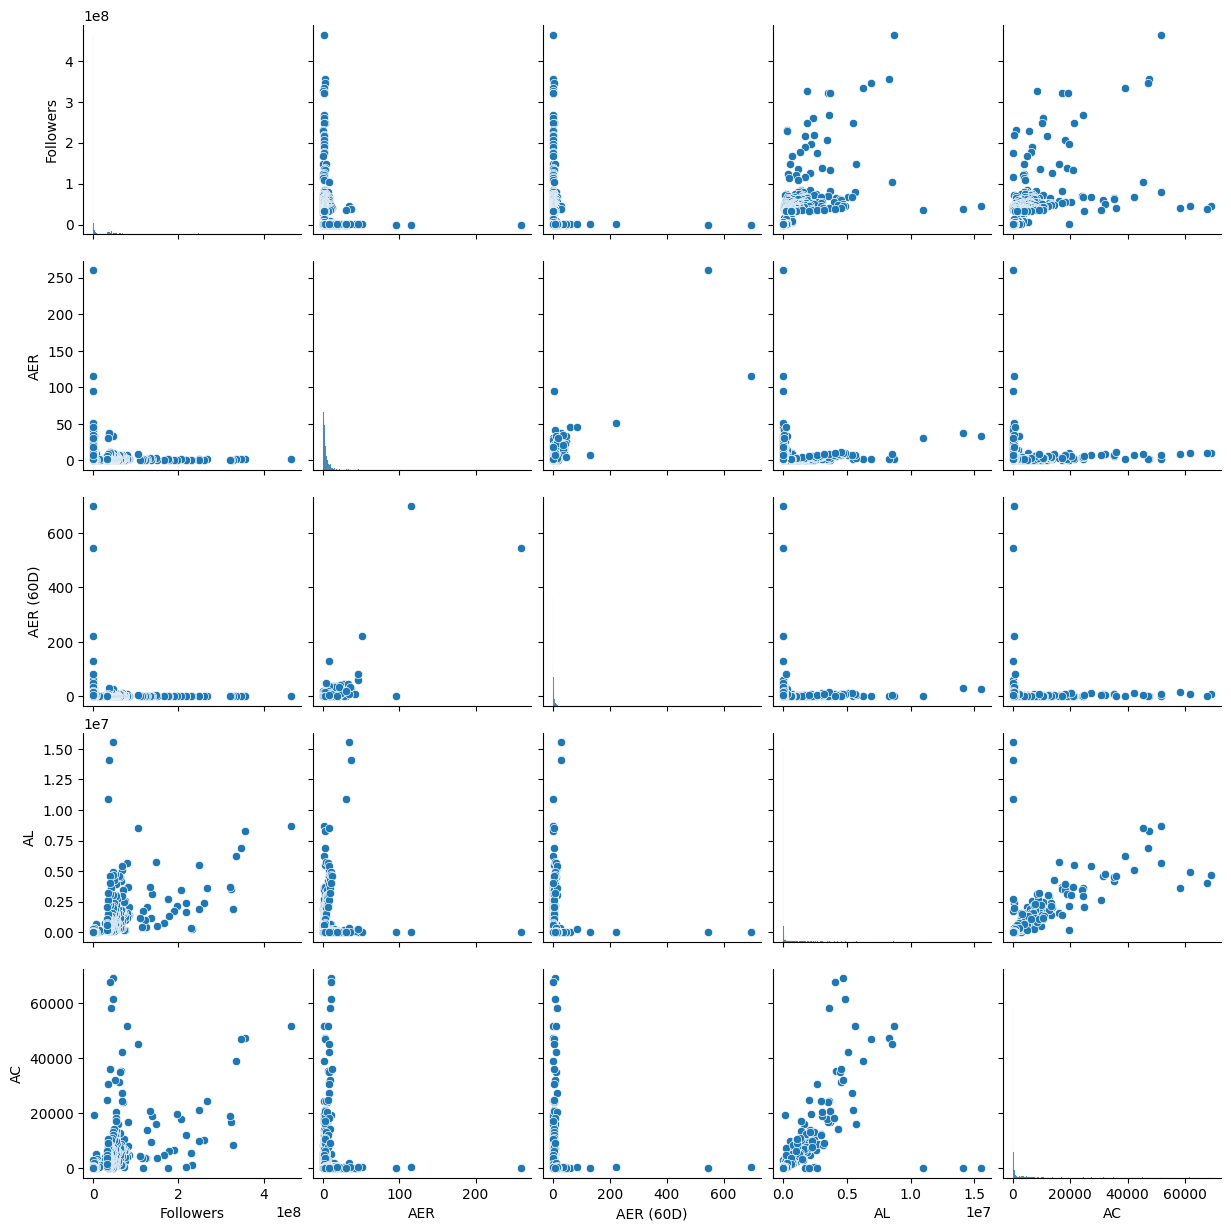

In [65]:
import seaborn as sns

df = pd.read_csv("merged_cleaned.csv")
original_columns = df.columns.tolist()

print("AER : Average Engagement Rate\nAER (60D): Average Engagement Rate Last 60 Days\nAL : Average Likes\nAC: Average Comments")

df = df.rename(columns={
    "Average_Engagement_Rate" : "AER",
    "Engagement_Rate_(60_Days)" : "AER (60D)",
    "Average_Likes" : "AL",
    "Average_Comments" : "AC"
})

sns.pairplot(df, vars=["Followers", "AER", "AER (60D)", "AL", "AC"])
df.columns = original_columns

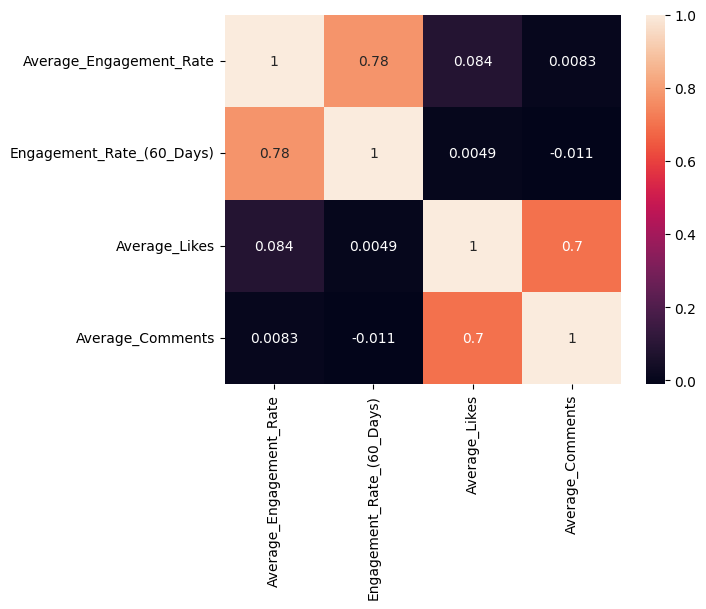

In [67]:
df_corr = df[["Average_Engagement_Rate", "Engagement_Rate_(60_Days)", "Average_Likes", "Average_Comments"]].corr()

sns.heatmap(df_corr, annot=True)
plt.show()

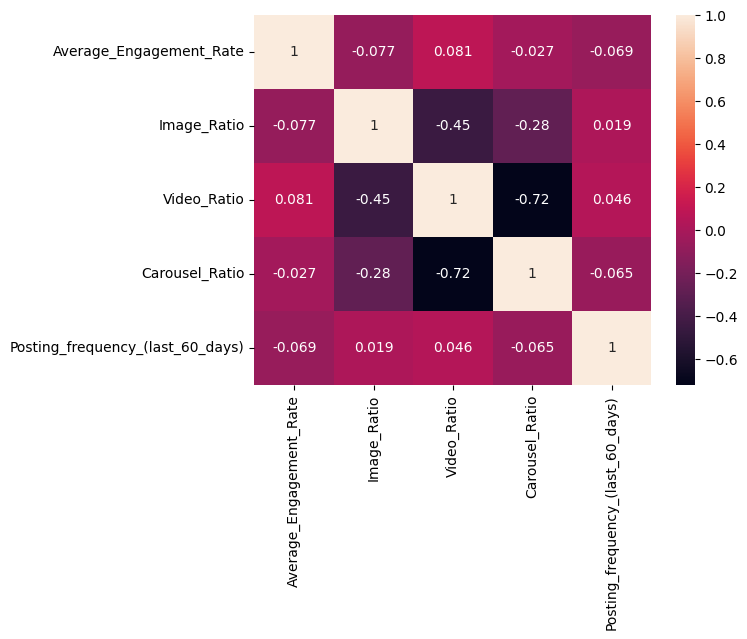

In [79]:
df_clean = df[df["Posting_frequency_(last_60_days)"] != 0].copy()

df_clean["Image_Ratio"] = df["Posts_(image)"] / df["Posting_frequency_(last_60_days)"]
df_clean["Video_Ratio"] = df["Posts_(videos)"] / df["Posting_frequency_(last_60_days)"]
df_clean["Carousel_Ratio"] = df["Posts_(carousel)"] / df["Posting_frequency_(last_60_days)"]

df_for_heatmap = df_clean[["Average_Engagement_Rate", "Image_Ratio", "Video_Ratio", "Carousel_Ratio", "Posting_frequency_(last_60_days)"]]
df_clean_corr = df_for_heatmap.corr()
sns.heatmap(df_clean_corr, annot=True)
plt.show()